### **CREDIT CARD FRAUD DETECTION**

### **Data Collection**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [2]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [4]:
from google.colab import files
df=files.upload()

Saving creditcard.csv to creditcard.csv


In [5]:
credit=pd.read_csv("creditcard.csv")
credit

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,14997,1.057155,0.495355,1.212903,2.548761,-0.105953,0.562292,-0.414434,0.135318,0.412228,...,0.089113,0.515654,-0.053050,-0.014731,0.340114,0.066419,0.003253,0.014148,17.44,0
9995,15001,1.178755,0.596025,0.074131,2.542393,0.450685,-0.179355,0.326365,-0.234949,0.473040,...,-0.228112,-0.561559,-0.182781,-0.523241,0.667142,0.015699,-0.067238,0.008709,53.19,0
9996,15004,1.228455,0.049488,1.022099,0.386471,-0.973228,-1.067822,-0.383162,-0.205407,1.699304,...,-0.322912,-0.730294,0.205601,0.686302,-0.071008,0.729846,-0.092276,0.012277,12.18,0
9997,15008,-0.971734,0.744625,2.334822,-0.408046,-0.999231,-0.629294,-0.377212,0.481230,1.599496,...,-0.116821,-0.141219,-0.026115,0.712719,-0.372964,0.750323,-0.107875,0.031272,4.05,0


In [6]:
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
credit.shape

(9999, 31)

In [75]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    9999 non-null   int64  
 1   V1      9999 non-null   float64
 2   V2      9999 non-null   float64
 3   V3      9999 non-null   float64
 4   V4      9999 non-null   float64
 5   V5      9999 non-null   float64
 6   V6      9999 non-null   float64
 7   V7      9999 non-null   float64
 8   V8      9999 non-null   float64
 9   V9      9999 non-null   float64
 10  V10     9999 non-null   float64
 11  V11     9999 non-null   float64
 12  V12     9999 non-null   float64
 13  V13     9999 non-null   float64
 14  V14     9999 non-null   float64
 15  V15     9999 non-null   float64
 16  V16     9999 non-null   float64
 17  V17     9999 non-null   float64
 18  V18     9999 non-null   float64
 19  V19     9999 non-null   float64
 20  V20     9999 non-null   float64
 21  V21     9999 non-null   float64
 22  

In [8]:
credit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,...,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,5965.128713,-0.241768,0.281829,0.906164,0.263916,-0.046353,0.133134,-0.071791,-0.064802,0.802379,...,-0.051994,-0.152667,-0.033292,0.021271,0.087125,0.108154,0.005533,0.002912,63.020562,0.003800
std,4472.712504,1.521726,1.308149,1.159164,1.441120,1.182986,1.307373,1.077437,1.259125,1.155150,...,0.913856,0.631114,0.487832,0.594425,0.428188,0.562819,0.410886,0.266261,184.492872,0.061533
min,0.000000,-27.670569,-34.607649,-15.496222,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-6.329801,...,-11.468435,-8.527145,-15.144340,-2.512377,-2.577363,-1.338556,-7.976100,-3.509250,0.000000,0.000000
25%,2072.500000,-1.013135,-0.208350,0.412752,-0.614489,-0.643510,-0.629975,-0.542363,-0.190784,0.071116,...,-0.268135,-0.549665,-0.174123,-0.327857,-0.158137,-0.328038,-0.084479,-0.015753,5.000000,0.000000
50%,4563.000000,-0.372624,0.288381,0.944342,0.219852,-0.152524,-0.152621,-0.055776,0.012791,0.805293,...,-0.123286,-0.136735,-0.045811,0.079956,0.120865,0.042879,-0.004566,0.015893,15.950000,0.000000
75%,10231.500000,1.150869,0.901632,1.602707,1.125501,0.371301,0.505448,0.476175,0.274582,1.506342,...,0.032715,0.247521,0.081546,0.410798,0.359081,0.476792,0.120836,0.077184,50.890000,0.000000
max,15010.000000,1.960497,8.636214,4.101716,10.463020,34.099309,21.393069,34.303177,5.060381,10.392889,...,22.588989,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


In [9]:
credit.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
credit = credit.dropna()

In [11]:
X = credit.drop("Class", axis=1)
y = credit["Class"]

In [12]:
legit = credit[credit.Class == 0]
print(legit.shape)

(9961, 31)


In [13]:
fraud = credit[credit.Class == 1]
print(fraud.shape)

(38, 31)


In [14]:
legit.Amount.describe()

count    9961.000000
mean       62.972075
std       183.908599
min         0.000000
25%         5.140000
50%        15.950000
75%        51.180000
max      7712.430000
Name: Amount, dtype: float64

In [15]:
fraud.Amount.describe()

count      38.000000
mean       75.730526
std       304.521215
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max      1809.680000
Name: Amount, dtype: float64

In [16]:
credit.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,5953.310109,-0.235837,0.268366,0.934095,0.243490,-0.041770,0.141696,-0.057655,-0.069438,0.814125,...,0.025802,-0.055023,-0.152622,-0.033326,0.022768,0.087389,0.107382,0.003549,0.001566,62.972075
1,9063.157895,-1.796662,3.810809,-6.415255,5.618146,-1.247563,-2.111328,-3.777261,1.150469,-2.276505,...,0.467700,0.741934,-0.164628,-0.024469,-0.371142,0.018063,0.310646,0.525443,0.355663,75.730526


### **DATA VISUALIZATION**

In [55]:
classes = credit['Class'].value_counts()
classes

0    9961
1      38
Name: Class, dtype: int64

In [57]:
genuine_share = round((classes[0]/credit['Class'].count()*100),2)
genuine_share

99.62

In [59]:
fraudulent_share = round((classes[1]/credit['Class'].count()*100),2)
fraudulent_share

0.38

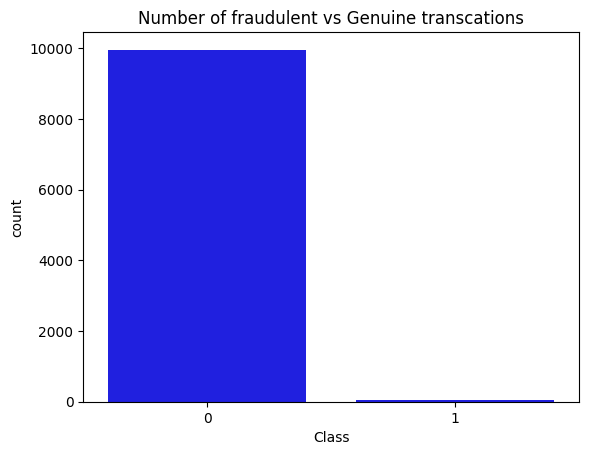

In [91]:
sns.countplot(x='Class', data=credit , color="blue")
plt.title('Number of fraudulent vs Genuine transcations')
plt.show()

In [65]:
fraud_percentage = {'Class':['Genuine', 'Fraudulent'], 'Percentage':[genuine_share, fraudulent_share]}
df_fraud_percentage = pd.DataFrame(fraud_percentage)

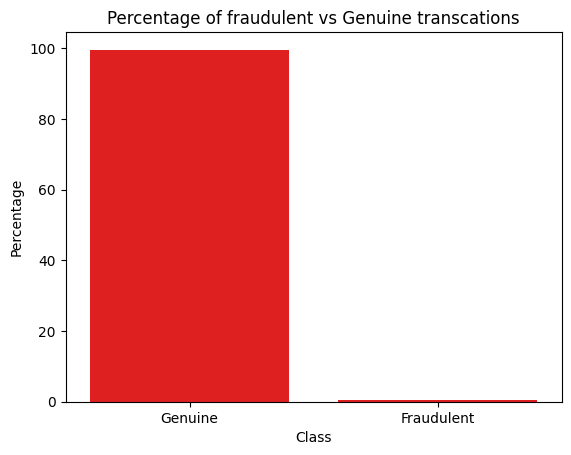

In [99]:
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage , color="red")
plt.title('Percentage of fraudulent vs Genuine transcations')
plt.show()

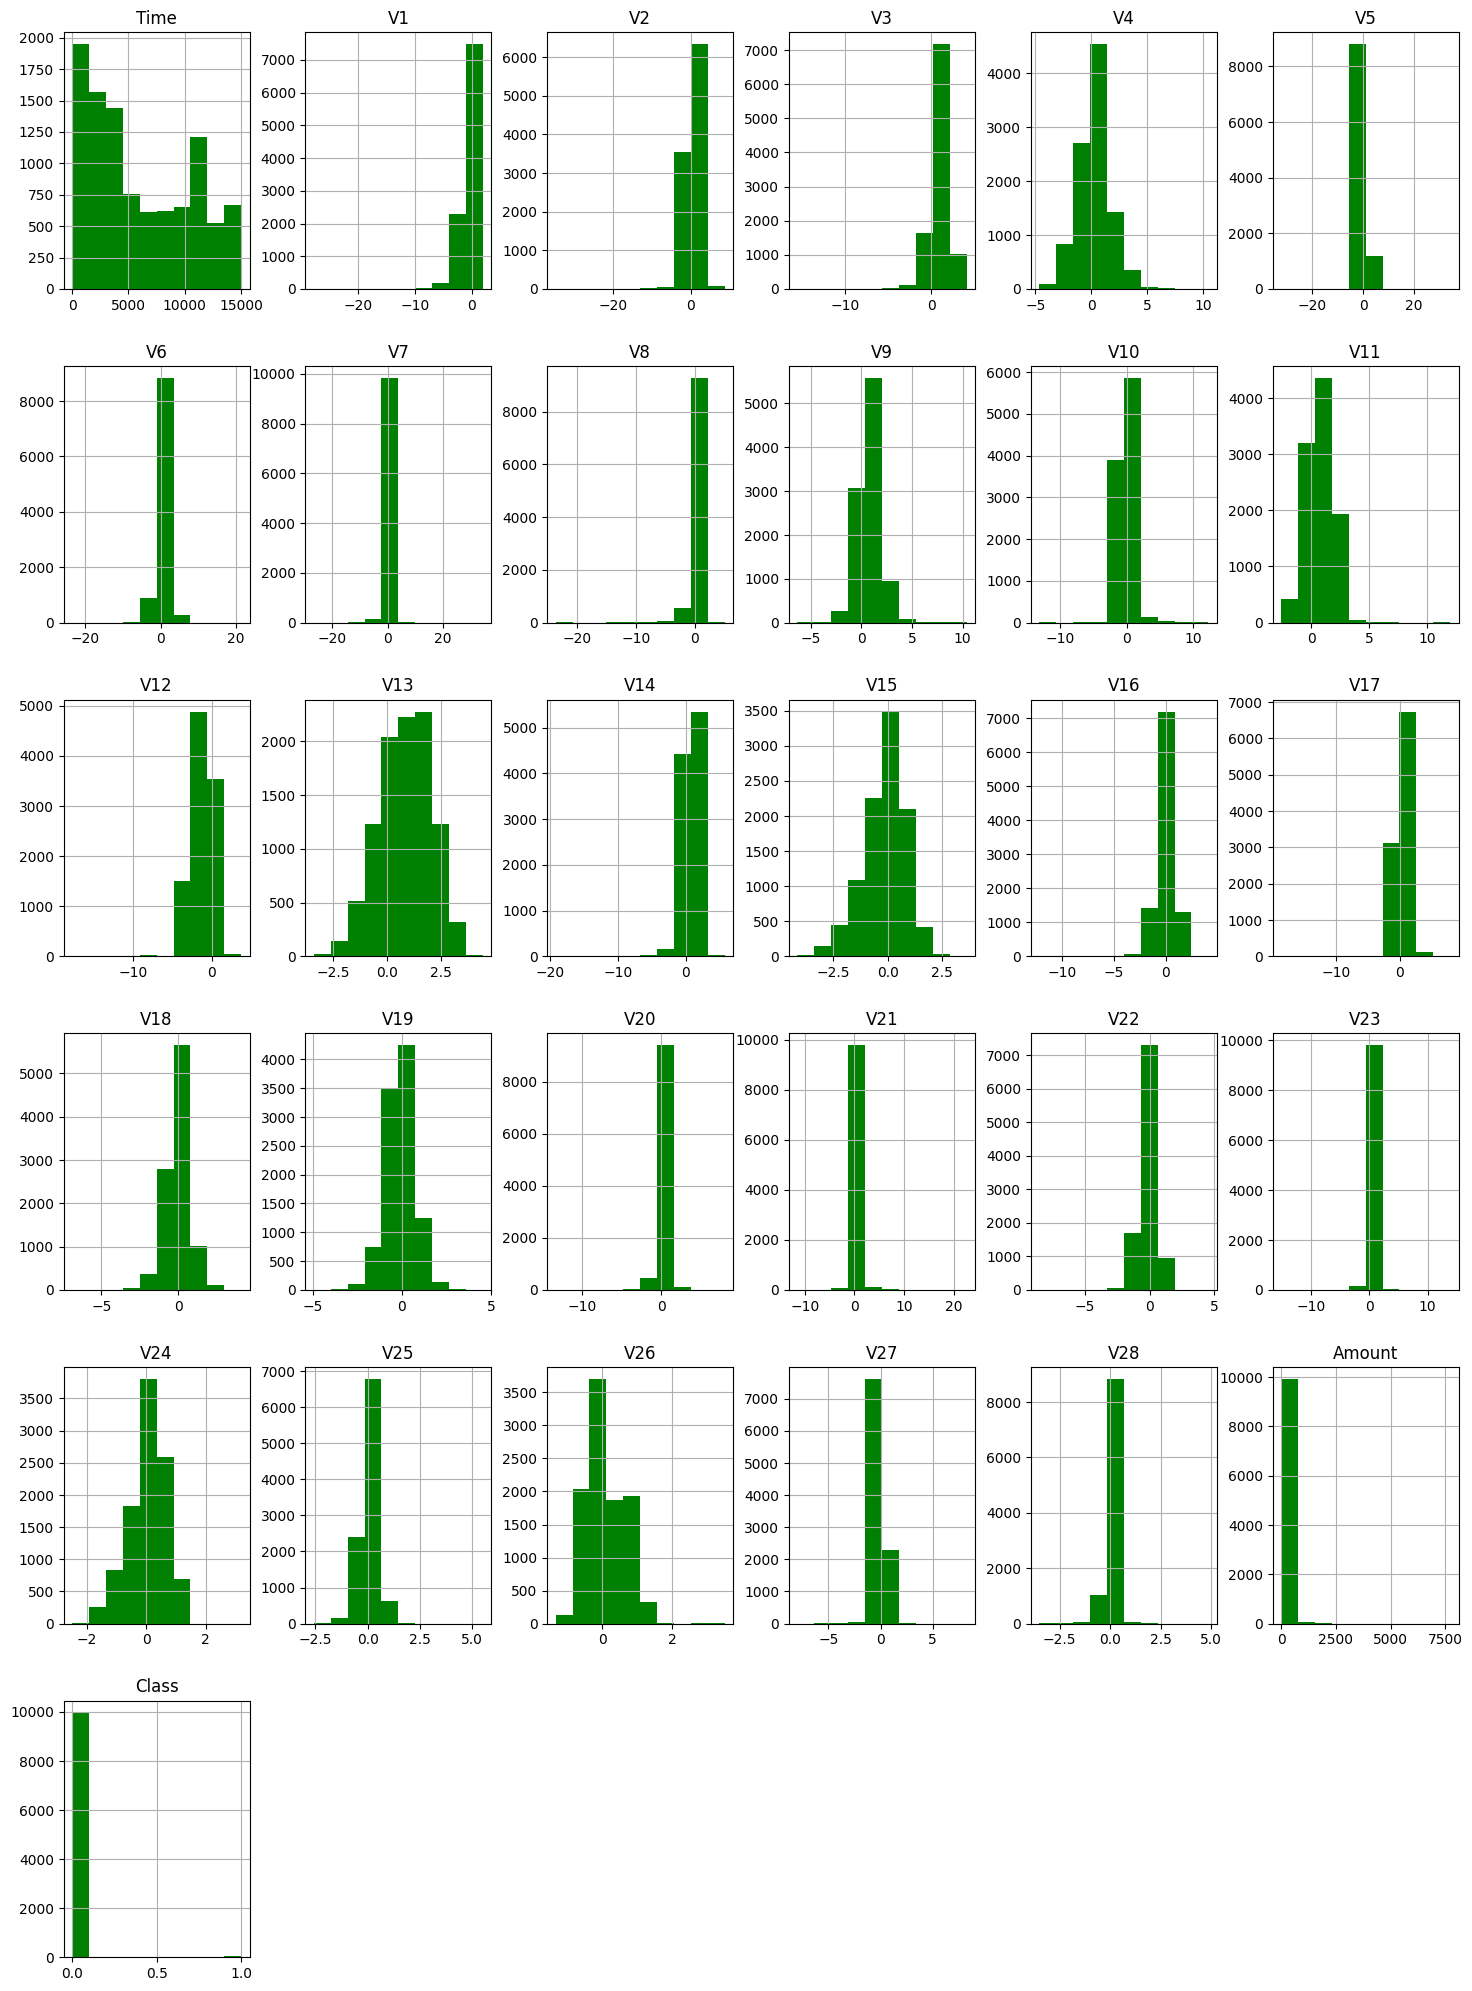

In [100]:
credit.hist(figsize = (18, 25), color="green")
plt.show()

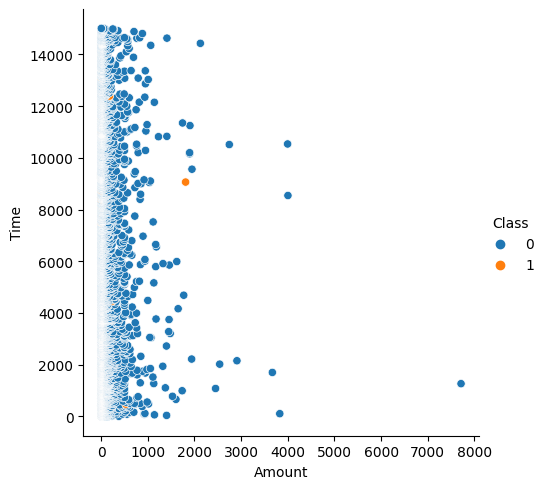

In [102]:
sns.relplot(x = 'Amount' , y = 'Time' , hue = 'Class', data = credit ,color="seablue")

<Axes: >

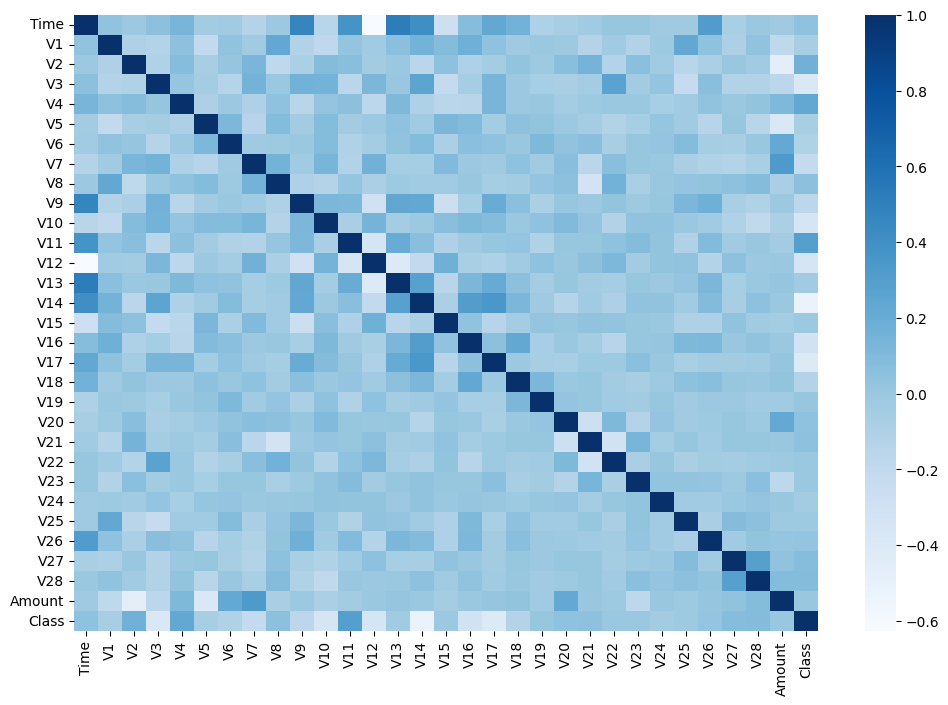

In [96]:
plt.figure(figsize=(12,8))
corr=credit.corr()
sns.heatmap(corr,cmap="Blues")

In [84]:
corrmat = credit.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(100,100))

<Figure size 10000x10000 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

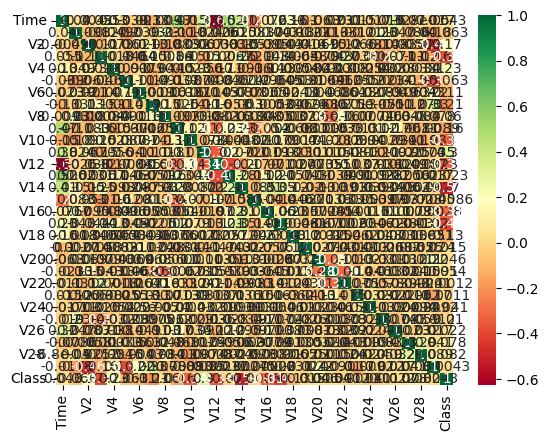

In [85]:
g=sns.heatmap(credit[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### **Data Preprocessing**

In [17]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
oversampler = RandomOverSampler(sampling_strategy=0.5)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

In [21]:
undersampler = RandomUnderSampler(sampling_strategy=0.5)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

### **Model Training**

In [22]:
model = RandomForestClassifier()

In [23]:
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier()

In [97]:
X_train_resampled.shape

(78, 30)

In [98]:
y_train_resampled.shape

(78,)

In [33]:
model.fit(X_train, y_train)

LogisticRegression()

In [27]:
X_train.shape

(7999, 30)

In [28]:
X_test.shape

(2000, 30)

In [29]:
y_train.shape

(7999,)

In [30]:
y_test.shape

(2000,)

### **Modal Evaluation**

In [39]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [34]:
y_pred=model.predict(X_train_resampled)

In [40]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9995


In [41]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1988
           1       1.00      0.92      0.96        12

    accuracy                           1.00      2000
   macro avg       1.00      0.96      0.98      2000
weighted avg       1.00      1.00      1.00      2000



In [42]:
confusion_matrix(y_test,y_pred)

array([[1988,    0],
       [   1,   11]])

In [43]:
precision = precision_score(y_test, y_pred)
print("Precision: {:.1f}".format(precision))

Precision: 1.0


In [44]:
recall = recall_score(y_test, y_pred)
print("Recall: {:.2f}".format(recall))

Recall: 0.92


In [45]:
f1 = f1_score(y_test, y_pred)
print("F1-score: {:.2f}".format(f1))

F1-score: 0.96
